# Capstone Project

The purpose of this capstone project is to analyze the different Madrid neighborhoods in order to find similitudes, and to compare the price of the houses, so we can understand which areas are underpriced.

First we will import the modules needed and get the neighborhoods data

In [1]:
import pandas as pd 
import wikipedia as wp

In [2]:
html = wp.page("List_of_neighborhoods_of_Madrid").html()
df=pd.read_html(html,header=0)[0]

In [3]:
df

,District name (number),District location,Number,Name,Image
0,Centro (1),NaN,11,Palacio,NaN
1,Centro (1),NaN,12,Embajadores,NaN
2,Centro (1),NaN,13,Cortes,NaN
3,Centro (1),NaN,14,Justicia,NaN
4,Centro (1),NaN,15,Universidad,NaN
...,...,...,...,...,...
123,Barajas (21),NaN,211,Alameda de Osuna,NaN
124,Barajas (21),NaN,212,Aeropuerto,NaN
125,Barajas (21),NaN,213,Casco Histórico de Barajas,NaN
126,Barajas (21),NaN,214,Timón,NaN


In [4]:
df.drop(columns=['District location','Image'],inplace=True)
df

,District name (number),Number,Name
0,Centro (1),11,Palacio
1,Centro (1),12,Embajadores
2,Centro (1),13,Cortes
3,Centro (1),14,Justicia
4,Centro (1),15,Universidad
...,...,...,...
123,Barajas (21),211,Alameda de Osuna
124,Barajas (21),212,Aeropuerto
125,Barajas (21),213,Casco Histórico de Barajas
126,Barajas (21),214,Timón


In [5]:
df.rename(columns={'District name (number)':'District','Name':'Neighborhood'},inplace=True)


In [6]:
df

,District,Number,Neighborhood
0,Centro (1),11,Palacio
1,Centro (1),12,Embajadores
2,Centro (1),13,Cortes
3,Centro (1),14,Justicia
4,Centro (1),15,Universidad
...,...,...,...
123,Barajas (21),211,Alameda de Osuna
124,Barajas (21),212,Aeropuerto
125,Barajas (21),213,Casco Histórico de Barajas
126,Barajas (21),214,Timón


In [7]:
df
df.count()

District        128
Number          128
Neighborhood    128
dtype: int64

In [8]:
df.loc[df.District.notnull()].count()

District        128
Number          128
Neighborhood    128
dtype: int64

In [9]:
len(df['Neighborhood'].unique())

128

In [10]:
df.shape

(128, 3)

In [11]:
prices = pd.read_excel (r'Madrid_prices.xlsx',header=1)
prices

,District,Price,Mensual change,3month change,Year change,Max,Max variation,Unnamed: 7,Unnamed: 8
0,Acacias,3.920 €/m2,-0.018,-0.064,-0.056,4.273 €/m2 dic 2018,-0.083,NaN,NaN
1,Chopera,3.578 €/m2,-0.001,-0.013,-0.047,3.843 €/m2 jun 2019,-0.069,NaN,NaN
2,Delicias,3.809 €/m2,0.008,-0.024,-0.092,4.193 €/m2 abr 2019,-0.092,NaN,NaN
3,Imperial,4.099 €/m2,0.030,0.045,-0.005,4.171 €/m2 feb 2019,-0.017,NaN,NaN
4,Legazpi,4.436 €/m2,-0.010,0.010,-0.013,4.714 €/m2 jun 2019,-0.059,NaN,NaN
...,...,...,...,...,...,...,...,...,...
125,Butarque,2.182 €/m2,0.015,0.018,0.022,2.472 €/m2 jun 2010,-0.117,NaN,NaN
126,Los Ángeles,1.737 €/m2,-0.022,-0.057,-0.039,2.487 €/m2 abr 2010,-0.302,NaN,NaN
127,Los Rosales,1.823 €/m2,-0.003,-0.024,0.007,2.299 €/m2 ago 2010,-0.207,NaN,NaN
128,San Andrés,1.656 €/m2,0.001,0.026,0.021,2.691 €/m2 ago 2009,-0.385,NaN,NaN


In [12]:
prices=prices.drop(columns=['Unnamed: 7','Unnamed: 8'])

In [13]:
prices['Price']=prices['Price'].str.replace(r'\€/m2','')

In [14]:
prices['Price']=prices['Price'].str.replace(r'.','')

In [15]:
prices['Max']=prices['Max'].str.replace(r'mayo','may')

In [16]:
prices['Max_period']=prices['Max']

In [17]:
prices

,District,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period
0,Acacias,3920,-0.018,-0.064,-0.056,4.273 €/m2 dic 2018,-0.083,4.273 €/m2 dic 2018
1,Chopera,3578,-0.001,-0.013,-0.047,3.843 €/m2 jun 2019,-0.069,3.843 €/m2 jun 2019
2,Delicias,3809,0.008,-0.024,-0.092,4.193 €/m2 abr 2019,-0.092,4.193 €/m2 abr 2019
3,Imperial,4099,0.030,0.045,-0.005,4.171 €/m2 feb 2019,-0.017,4.171 €/m2 feb 2019
4,Legazpi,4436,-0.010,0.010,-0.013,4.714 €/m2 jun 2019,-0.059,4.714 €/m2 jun 2019
...,...,...,...,...,...,...,...,...
125,Butarque,2182,0.015,0.018,0.022,2.472 €/m2 jun 2010,-0.117,2.472 €/m2 jun 2010
126,Los Ángeles,1737,-0.022,-0.057,-0.039,2.487 €/m2 abr 2010,-0.302,2.487 €/m2 abr 2010
127,Los Rosales,1823,-0.003,-0.024,0.007,2.299 €/m2 ago 2010,-0.207,2.299 €/m2 ago 2010
128,San Andrés,1656,0.001,0.026,0.021,2.691 €/m2 ago 2009,-0.385,2.691 €/m2 ago 2009


In [20]:
prices['Max_period']=prices['Max_period'].str.replace(r'^...........','')
prices['Max']=prices['Max'].str.replace(r' €/m2.........','')
prices['Max']=prices['Max'].str.replace(r'.','')

In [21]:
prices

,District,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period
0,Acacias,3920,-0.018,-0.064,-0.056,4273,-0.083,dic 2018
1,Chopera,3578,-0.001,-0.013,-0.047,3843,-0.069,jun 2019
2,Delicias,3809,0.008,-0.024,-0.092,4193,-0.092,abr 2019
3,Imperial,4099,0.030,0.045,-0.005,4171,-0.017,feb 2019
4,Legazpi,4436,-0.010,0.010,-0.013,4714,-0.059,jun 2019
...,...,...,...,...,...,...,...,...
125,Butarque,2182,0.015,0.018,0.022,2472,-0.117,jun 2010
126,Los Ángeles,1737,-0.022,-0.057,-0.039,2487,-0.302,abr 2010
127,Los Rosales,1823,-0.003,-0.024,0.007,2299,-0.207,ago 2010
128,San Andrés,1656,0.001,0.026,0.021,2691,-0.385,ago 2009


In [23]:
prices=prices.astype({'Price':'int32','Max':'int32'})

In [24]:
prices.rename(columns={'District':'Neighborhood'},inplace=True)

In [25]:
madrid_pr = pd.merge(df,prices,on='Neighborhood')

In [26]:
madrid_pr

,District,Number,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period
0,Centro (1),11,Palacio,4800,0.026,-0.011,-0.041,5073,-0.054,mar 2019
1,Centro (1),16,Sol,5003,0.008,-0.021,-0.061,5468,-0.085,ago 2019
2,Arganzuela (2),21,Imperial,4099,0.030,0.045,-0.005,4171,-0.017,feb 2019
3,Arganzuela (2),22,Acacias,3920,-0.018,-0.064,-0.056,4273,-0.083,dic 2018
4,Arganzuela (2),23,Chopera,3578,-0.001,-0.013,-0.047,3843,-0.069,jun 2019
5,Arganzuela (2),24,Legazpi,4436,-0.010,0.010,-0.013,4714,-0.059,jun 2019
6,Arganzuela (2),25,Delicias,3809,0.008,-0.024,-0.092,4193,-0.092,abr 2019
7,Arganzuela (2),26,Palos de Moguer,3986,0.028,0.011,0.005,4128,-0.034,dic 2018
8,Retiro (3),31,Pacífico,4121,-0.018,-0.007,0.033,4197,-0.018,oct 2019
9,Retiro (3),32,Adelfas,4242,0.007,0.007,-0.025,4353,-0.025,may 2019


After exploring the data, we found that we had more valuable information in the idealista table, so we wont merge the data and will use the name of the neighborhoods from idealista instead.

We will now find the location of the neighborhods using the geocoder

In [27]:
import geocoder

In [28]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Madrid, Spain'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [29]:
coords = [ get_latlng(neighborhood) for neighborhood in prices["Neighborhood"].tolist() ]

In [30]:
coords

[[40.40137000000004, -3.7066899999999805],
 [40.39536000000004, -3.6983299999999417],
 [40.39613000000003, -3.68945999999994],
 [40.408330000000035, -3.7186499999999683],
 [40.387020000000064, -3.689899999999966],
 [40.40301000000005, -3.6935799999999404],
 [40.45818000000003, -3.589529999999968],
 [40.46089000000006, -3.6156299999999533],
 [40.47482000000008, -3.5795099999999707],
 [40.48568000000006, -3.6047199999999293],
 [40.379800000000046, -3.726359999999943],
 [40.36860000000007, -3.7400499999999397],
 [40.39495000000005, -3.70975999999996],
 [40.38915000000003, -3.7237499999999386],
 [40.39094000000006, -3.7241999999999393],
 [40.37982000000005, -3.7404599999999277],
 [40.395880000000034, -3.730479999999943],
 [40.38492000000008, -3.74634999999995],
 [40.42134997446482, -3.6987299561428815],
 [40.41396802091068, -3.7005808829835556],
 [40.40853000000004, -3.704960043857045],
 [40.42872587320638, -3.7041226052700624],
 [40.415170000000046, -3.712729999999965],
 [40.4180200000000

In [31]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [32]:
prices['Latitude'] = df_coords['Latitude']
prices['Longitude'] = df_coords['Longitude']

## Getting the venues

Next, we import the modules needed to use the foursquare API and our credentials.

In [34]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np

In [35]:
CLIENT_ID = '3*********' # your Foursquare ID
CLIENT_SECRET = '***********' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Please note that the cliend id and secret codes were used and deleted afterwards, as they are personal keys

We will now define a function to get the different venues based on the neigbhborhood, latitude and longitude

In [140]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

And now we will call the function to obtain the different venues

In [141]:
madrid_venues = getNearbyVenues(names=prices['Neighborhood'],
                                   latitudes=prices['Latitude'],
                                   longitudes=prices['Longitude']
                                  )



Acacias
Chopera
Delicias
Imperial
Legazpi
Palos de Moguer
Alameda de Osuna
Campo de las Naciones-Corralejos
Casco Histórico de Barajas
Timón
Abrantes
Buena Vista
Comillas
Opañel
Pau de Carabanchel
Puerta Bonita
San Isidro
Vista Alegre
Chueca-Justicia
Huertas-Cortes
Lavapiés-Embajadores
Malasaña-Universidad
Palacio
Sol
Bernabéu-Hispanoamérica
Castilla
Ciudad Jardín
El Viso
Nueva España
Prosperidad
Almagro
Arapiles
Gaztambide
Nuevos Ministerios-Ríos Rosas
Trafalgar
Vallehermoso
Atalaya
Colina
Concepción
Costillares
Pueblo Nuevo
Quintana
San Juan Bautista
San Pascual
Ventas
Fuentelarreina
La Paz
Las Tablas
Mirasierra
Montecarmelo
Peñagrande
Pilar
Tres Olivos - Valverde
Apóstol Santiago
Canillas
Conde Orgaz-Piovera
Palomas
Pinar del Rey
Sanchinarro
Valdebebas - Valdefuentes
Virgen del Cortijo - Manoteras
Águilas
Aluche
Campamento
Los Cármenes
Lucero
Puerta del Ángel
Aravaca
Argüelles
Casa de Campo
Ciudad Universitaria
El Plantío
Valdemarín
Valdezarza
Fontarrón
Marroquina
Media Legua
Pavone

In [142]:
print(madrid_venues.shape)
madrid_venues.head()

(11296, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acacias,40.40137,-3.70669,AltaFit Puerta de Toledo,40.405115,-3.707649,Gym / Fitness Center
1,Acacias,40.40137,-3.70669,La Gelateria di Angelo,40.397951,-3.707739,Ice Cream Shop
2,Acacias,40.40137,-3.70669,Tabacalera Promoción del Arte,40.406386,-3.703242,Art Gallery
3,Acacias,40.40137,-3.70669,sushi raku,40.404623,-3.708216,Sushi Restaurant
4,Acacias,40.40137,-3.70669,El Capricho Extremeño,40.407090,-3.708261,Tapas Restaurant


## Grouping the venues and formatting our dataframe

In [143]:
madrid_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
12 de Octubre-Orcasur,100,100,100,100,100,100
Abrantes,100,100,100,100,100,100
Acacias,100,100,100,100,100,100
Adelfas,100,100,100,100,100,100
Alameda de Osuna,100,100,100,100,100,100
Almagro,100,100,100,100,100,100
Almendrales,100,100,100,100,100,100
Aluche,100,100,100,100,100,100
Ambroz,76,76,76,76,76,76


In [144]:
print('There are {} uniques categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 276 uniques categories.


To determine what venue appears with more frequency for each neighborhood, we will now create a new dataframe:

In [145]:
# one hot encoding
madrid_onehot = pd.get_dummies(madrid_venues[['Venue Category']], prefix="", prefix_sep="")
madrid_onehot.drop(['Neighborhood'],axis=1,inplace=True) 


madrid_onehot['Neighborhood'] = madrid_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,...,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Acacias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acacias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acacias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Acacias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Acacias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
madrid_onehot.shape

(11296, 276)

In [147]:
madrid_grouped = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_grouped

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,...,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,12 de Octubre-Orcasur,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.010000,0.00,0.000000,0.00,0.000000
1,Abrantes,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,Acacias,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.010000,0.01,0.000000,0.00,0.000000
3,Adelfas,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.01,0.000000,0.000000,0.00,0.010000,0.00,0.000000,0.00,0.000000
4,Alameda de Osuna,0.010000,0.00,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.010000,0.00,0.000000,0.00,0.000000
5,Almagro,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
6,Almendrales,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.010000,0.00,0.000000,0.00,0.000000
7,Aluche,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.010000
8,Ambroz,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.013158
9,Amposta,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000


In [148]:
madrid_grouped.shape

(130, 276)

We have now a table with the frequency for the different kind of venues per neighborhood. The next step is to check what is the mode for each neighborhood, or the most repeatead venue type

In [149]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [150]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = madrid_grouped['Neighborhood']

for ind in np.arange(madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12 de Octubre-Orcasur,Spanish Restaurant,Grocery Store,Bar,Park,Fast Food Restaurant,Supermarket,Gym / Fitness Center,Restaurant,Coffee Shop,Beer Garden
1,Abrantes,Fast Food Restaurant,Grocery Store,Tapas Restaurant,Bar,Supermarket,Pizza Place,Plaza,Spanish Restaurant,Coffee Shop,Café
2,Acacias,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Restaurant,Bar,Plaza,Hostel,Cocktail Bar,Café
3,Adelfas,Spanish Restaurant,Park,Restaurant,Museum,Bar,Plaza,Gym,Italian Restaurant,Garden,Hotel
4,Alameda de Osuna,Hotel,Spanish Restaurant,Restaurant,Tapas Restaurant,Clothing Store,Supermarket,Duty-free Shop,Rental Car Location,Fast Food Restaurant,Bowling Alley


With the table above we can start to see some relations between the different neighborhoods, in terms of similarity of venues types.

We will now classify them in clusters using the K-Means algorithm.

## Clustering and visualizing the neigborhoods

First, we import the modules that will be needed

In [126]:
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import folium # map rendering library


We now define the hyperparameters of the K-Means algorithm and fit the model with our data. For this purpose, we will first use the elbow method in ordeer to find the optimal value for the number of clusters needed:

/Users/juancarlosmartinezteba/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/juancarlosmartinezteba/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/juancarlosmartinezteba/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


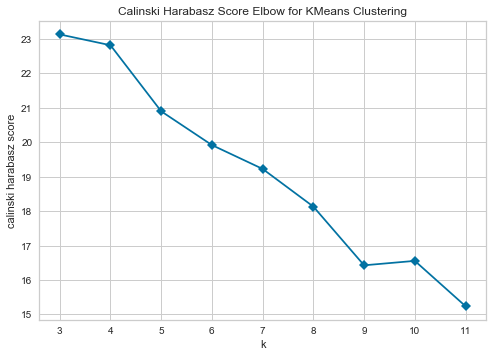

In [151]:
madrid_grouped_clustering = madrid_grouped.drop('Neighborhood', 1)

# run k-means clustering
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(madrid_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:9] 

In [152]:
# set number of clusters
kclusters = 9
model = KMeans()

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:8] 

array([7, 1, 3, 7, 0, 3, 7, 1], dtype=int32)

In [153]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,7,12 de Octubre-Orcasur,Spanish Restaurant,Grocery Store,Bar,Park,Fast Food Restaurant,Supermarket,Gym / Fitness Center,Restaurant,Coffee Shop,Beer Garden
1,1,Abrantes,Fast Food Restaurant,Grocery Store,Tapas Restaurant,Bar,Supermarket,Pizza Place,Plaza,Spanish Restaurant,Coffee Shop,Café
2,3,Acacias,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Restaurant,Bar,Plaza,Hostel,Cocktail Bar,Café
3,7,Adelfas,Spanish Restaurant,Park,Restaurant,Museum,Bar,Plaza,Gym,Italian Restaurant,Garden,Hotel
4,0,Alameda de Osuna,Hotel,Spanish Restaurant,Restaurant,Tapas Restaurant,Clothing Store,Supermarket,Duty-free Shop,Rental Car Location,Fast Food Restaurant,Bowling Alley


In [154]:
madrid_merged = prices

madrid_merged = madrid_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

madrid_merged.head() # check the last columns!

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acacias,3920,-0.018,-0.064,-0.056,4273,-0.083,dic 2018,40.40137,-3.70669,...,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Restaurant,Bar,Plaza,Hostel,Cocktail Bar,Café
1,Chopera,3578,-0.001,-0.013,-0.047,3843,-0.069,jun 2019,40.39536,-3.69833,...,Restaurant,Art Gallery,Spanish Restaurant,Coffee Shop,Plaza,Tapas Restaurant,Bar,Park,Hotel,Argentinian Restaurant
2,Delicias,3809,0.008,-0.024,-0.092,4193,-0.092,abr 2019,40.39613,-3.68946,...,Plaza,Art Gallery,Restaurant,Café,Park,Art Museum,Museum,Spanish Restaurant,Bar,Coffee Shop
3,Imperial,4099,0.030,0.045,-0.005,4171,-0.017,feb 2019,40.40833,-3.71865,...,Tapas Restaurant,Plaza,Spanish Restaurant,Park,Hotel,Hostel,Art Gallery,Bar,Coffee Shop,Sushi Restaurant
4,Legazpi,4436,-0.010,0.010,-0.013,4714,-0.059,jun 2019,40.38702,-3.68990,...,Spanish Restaurant,Restaurant,Coffee Shop,Café,Pizza Place,Park,Grocery Store,Asian Restaurant,Chinese Restaurant,Bar


In [155]:
madrid_merged['Cluster Labels']

0      3
1      3
2      7
3      3
4      2
5      3
6      0
7      2
8      0
9      2
10     1
11     1
12     7
13     7
14     7
15     1
16     1
17     1
18     3
19     3
20     3
21     3
22     3
23     3
24     6
25     6
26     6
27     6
28     6
29     6
30     3
31     3
32     3
33     6
34     3
35     2
36     6
37     6
38     2
39     2
40     2
41     2
42     6
43     2
44     2
45     1
46     2
47     6
48     1
49     1
50     7
51     2
52     2
53     2
54     6
55     6
56     2
57     2
58     3
59     2
60     2
61     1
62     1
63     1
64     7
65     8
66     7
67     2
68     3
69     8
70     2
71     6
72     2
73     2
74     1
75     1
76     6
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     2
85     7
86     6
87     6
88     3
89     6
90     7
91     3
92     6
93     6
94     6
95     6
96     6
97     2
98     2
99     2
100    2
101    0
102    7
103    2
104    2
105    6
106    6
107    6
108    6
109    6
110    6
1

We will now use the geolocator to obtain the latitude and longitude of Madrid, which will be used to draw the map later:

In [156]:
madrid_merged.dropna(inplace=True)

In [157]:
address = 'Madrid'

geolocator = Nominatim(user_agent="Madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


We create the map using folium and draw the neighborhoods with the actual average price for the properties in that area:

In [204]:
madrid_geo = r'madridgeo.json'

In [205]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

map_clusters.choropleth(
    geo_data=madrid_geo,
    data=madrid_merged,
    columns=['Neighborhood', 'Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.5,
    legend_name='Price per square meter'
)

# display map
map_clusters

We will now add markups for the different clusters:

In [206]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighborhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [256]:
clustersmean=madrid_merged.groupby('Cluster Labels').mean()
clustersmean

,Price,Mensual change,3month change,Max,Max variation,Latitude,Longitude
Cluster Labels,,,,,,,
0,3119.333333,0.006000,-0.004667,3286.000000,-0.051000,40.459763,-3.581310
1,2280.758621,-0.002448,-0.008862,2736.862069,-0.172138,40.394966,-3.685521
2,3103.000000,0.003903,0.010065,3460.806452,-0.107161,40.445848,-3.665427
3,5145.777778,0.006889,0.004944,5313.222222,-0.033444,40.419235,-3.703112
4,2417.000000,0.012000,-0.001000,2420.000000,-0.001000,40.401433,-3.552617
5,2139.000000,0.010000,-0.003000,2441.000000,-0.124000,40.389990,-3.561230
6,4478.103448,0.001862,-0.001690,4721.241379,-0.055172,40.448319,-3.680858
7,2754.250000,-0.005562,0.004625,3099.937500,-0.120438,40.396663,-3.705472
8,2969.500000,0.003500,-0.022000,3335.500000,-0.114000,40.408470,-3.754710


In [197]:
madrid_merged.loc[madrid_merged['Cluster Labels']==0]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Alameda de Osuna,3340,0.008,0.020,0.016,3340,0.000,abr 2020,40.45818,-3.58953,...,Hotel,Spanish Restaurant,Restaurant,Tapas Restaurant,Clothing Store,Supermarket,Duty-free Shop,Rental Car Location,Fast Food Restaurant,Bowling Alley
8,Casco Histórico de Barajas,2992,-0.001,-0.035,-0.029,3203,-0.066,dic 2019,40.47482,-3.57951,...,Hotel,Spanish Restaurant,Coffee Shop,Duty-free Shop,Airport Lounge,Airport Service,Restaurant,Tapas Restaurant,Rental Car Location,Japanese Restaurant
101,Rejas,3026,0.011,0.001,-0.012,3315,-0.087,ene 2009,40.44629,-3.57489,...,Hotel,Spanish Restaurant,Restaurant,Hotel Bar,Clothing Store,Supermarket,Rental Car Location,Italian Restaurant,Breakfast Spot,Burger Joint


In [162]:
madrid_merged.loc[madrid_merged['Cluster Labels']==1]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Abrantes,1938,0.015,0.030,0.012,2615,-0.259,may 2010,40.379800,-3.726360,...,Fast Food Restaurant,Grocery Store,Tapas Restaurant,Bar,Supermarket,Pizza Place,Plaza,Spanish Restaurant,Coffee Shop,Café
11,Buena Vista,2042,-0.009,0.030,0.027,2460,-0.170,dic 2010,40.368600,-3.740050,...,Fast Food Restaurant,Spanish Restaurant,Park,Pizza Place,Tapas Restaurant,Furniture / Home Store,Bar,Supermarket,Clothing Store,Gym
15,Puerta Bonita,1980,0.002,0.020,0.013,2696,-0.265,jun 2009,40.379820,-3.740460,...,Fast Food Restaurant,Bar,Tapas Restaurant,Restaurant,Supermarket,Italian Restaurant,Coffee Shop,Park,Pizza Place,Concert Hall
16,San Isidro,2221,-0.004,-0.035,-0.03,2908,-0.236,abr 2009,40.395880,-3.730480,...,Grocery Store,Pizza Place,Park,Fast Food Restaurant,Bar,Bakery,Coffee Shop,Spanish Restaurant,Supermarket,Plaza
17,Vista Alegre,2019,-0.023,-0.012,-0.015,2528,-0.201,nov 2009,40.384920,-3.746350,...,Tapas Restaurant,Bar,Pizza Place,Spanish Restaurant,Restaurant,Italian Restaurant,Fast Food Restaurant,Park,Concert Hall,Grocery Store
45,Fuentelarreina,3311,-0.020,-0.037,-0.044,4296,-0.229,abr 2011,40.480200,-3.739340,...,Athletics & Sports,Pizza Place,Bakery,Bar,Grocery Store,Restaurant,Spanish Restaurant,Tapas Restaurant,Italian Restaurant,Soccer Field
48,Mirasierra,3759,-0.002,0.031,0.057,3963,-0.051,mar 2011,40.494270,-3.717690,...,Bar,Tapas Restaurant,Restaurant,Burger Joint,Café,Pizza Place,Supermarket,Italian Restaurant,Mediterranean Restaurant,Beer Garden
49,Montecarmelo,4576,-0.001,0.000,0.079,4630,-0.012,oct 2019,40.493820,-3.737941,...,Restaurant,Spanish Restaurant,Bar,Athletics & Sports,Chinese Restaurant,Café,Golf Course,Dog Run,Park,Seafood Restaurant
61,Águilas,2247,0.048,0.057,0.065,2648,-0.152,mar 2010,40.381660,-3.771880,...,Bar,Spanish Restaurant,Italian Restaurant,Fast Food Restaurant,Restaurant,Park,Train Station,Pizza Place,Shopping Mall,Tapas Restaurant
62,Aluche,2246,0.021,0.015,0.031,2658,-0.155,ago 2009,40.392710,-3.760320,...,Bar,Pizza Place,Italian Restaurant,Park,Tapas Restaurant,Spanish Restaurant,Fast Food Restaurant,Grocery Store,Exhibit,Restaurant


In [163]:
madrid_merged.loc[madrid_merged['Cluster Labels']==2]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Legazpi,4436,-0.010,0.010,-0.013,4714,-0.059,jun 2019,40.387020,-3.689900,...,Spanish Restaurant,Restaurant,Coffee Shop,Café,Pizza Place,Park,Grocery Store,Asian Restaurant,Chinese Restaurant,Bar
7,Campo de las Naciones-Corralejos,3590,-0.002,0.033,0.089,3901,-0.080,feb 2011,40.460890,-3.615630,...,Spanish Restaurant,Park,Hotel,Restaurant,Pizza Place,Gym,Café,Italian Restaurant,Bar,Music Venue
9,Timón,2998,-0.027,-0.029,-0.043,3251,-0.078,jun 2011,40.485680,-3.604720,...,Airport Lounge,Restaurant,Coffee Shop,Spanish Restaurant,Soccer Field,Deli / Bodega,Airport Service,Train Station,Supermarket,Fish Market
35,Vallehermoso,4640,-0.005,0.021,0.101,4665,-0.005,mar 2020,40.444800,-3.714830,...,Spanish Restaurant,Restaurant,Tapas Restaurant,Bar,Café,Japanese Restaurant,Ice Cream Shop,Burger Joint,Pizza Place,Supermarket
38,Concepción,3189,-0.020,-0.022,-0.019,3474,-0.082,may 2010,40.439730,-3.648500,...,Spanish Restaurant,Bar,Restaurant,Park,Café,Hotel,Coffee Shop,Gym / Fitness Center,Gym,Tapas Restaurant
39,Costillares,4195,0.000,-0.017,-0.002,4306,-0.026,jun 2019,40.480410,-3.668270,...,Spanish Restaurant,Restaurant,Park,Supermarket,Bar,Hotel,Italian Restaurant,Pub,Mediterranean Restaurant,Gym / Fitness Center
40,Pueblo Nuevo,2530,-0.010,0.014,0.026,3050,-0.170,ene 2009,40.428950,-3.638260,...,Spanish Restaurant,Bar,Restaurant,Supermarket,Park,Bakery,Gym / Fitness Center,Hotel,Brewery,Tapas Restaurant
41,Quintana,2847,0.019,0.007,-0.006,3094,-0.080,ago 2010,40.437500,-3.642222,...,Spanish Restaurant,Bar,Café,Park,Hotel,Grocery Store,Rock Club,Coffee Shop,Gastropub,Bakery
43,San Pascual,3532,0.029,0.038,-0.001,4126,-0.144,ago 2019,40.445500,-3.651810,...,Spanish Restaurant,Bar,Park,Hotel,Tapas Restaurant,Bakery,Supermarket,Restaurant,Grocery Store,Café
44,Ventas,2718,0.010,0.020,0.002,3015,-0.099,mar 2009,40.422380,-3.650200,...,Bar,Spanish Restaurant,Restaurant,Park,Supermarket,Gym,Plaza,Tapas Restaurant,Bakery,Pub


In [164]:
madrid_merged.loc[madrid_merged['Cluster Labels']==3]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acacias,3920,-0.018,-0.064,-0.056,4273,-0.083,dic 2018,40.401370,-3.706690,...,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Restaurant,Bar,Plaza,Hostel,Cocktail Bar,Café
1,Chopera,3578,-0.001,-0.013,-0.047,3843,-0.069,jun 2019,40.395360,-3.698330,...,Restaurant,Art Gallery,Spanish Restaurant,Coffee Shop,Plaza,Tapas Restaurant,Bar,Park,Hotel,Argentinian Restaurant
3,Imperial,4099,0.030,0.045,-0.005,4171,-0.017,feb 2019,40.408330,-3.718650,...,Tapas Restaurant,Plaza,Spanish Restaurant,Park,Hotel,Hostel,Art Gallery,Bar,Coffee Shop,Sushi Restaurant
5,Palos de Moguer,3986,0.028,0.011,0.005,4128,-0.034,dic 2018,40.403010,-3.693580,...,Hotel,Plaza,Art Gallery,Restaurant,Art Museum,Museum,Theater,Cocktail Bar,Hostel,Café
18,Chueca-Justicia,5983,0.021,0.015,-0.003,6120,-0.022,jul 2019,40.421350,-3.698730,...,Plaza,Restaurant,Hotel,Bookstore,Ice Cream Shop,Café,Tapas Restaurant,Cocktail Bar,Mediterranean Restaurant,Coffee Shop
19,Huertas-Cortes,5159,-0.021,-0.021,-0.005,5481,-0.059,jun 2018,40.413968,-3.700581,...,Plaza,Spanish Restaurant,Tapas Restaurant,Hotel,Restaurant,Hostel,Café,Theater,Art Museum,Art Gallery
20,Lavapiés-Embajadores,4455,0.002,-0.005,0.015,4489,-0.008,feb 2020,40.408530,-3.704960,...,Tapas Restaurant,Plaza,Spanish Restaurant,Art Gallery,Bar,Restaurant,Café,Hostel,Theater,Cocktail Bar
21,Malasaña-Universidad,5337,0.008,0.010,0.03,5337,0.000,abr 2020,40.428726,-3.704123,...,Plaza,Restaurant,Hotel,Tapas Restaurant,Spanish Restaurant,Bookstore,Ice Cream Shop,Café,Japanese Restaurant,Theater
22,Palacio,4800,0.026,-0.011,-0.041,5073,-0.054,mar 2019,40.415170,-3.712730,...,Tapas Restaurant,Plaza,Spanish Restaurant,Bar,Hostel,Hotel,Restaurant,Mediterranean Restaurant,Theater,Gourmet Shop
23,Sol,5003,0.008,-0.021,-0.061,5468,-0.085,ago 2019,40.418020,-3.705770,...,Plaza,Tapas Restaurant,Restaurant,Spanish Restaurant,Hotel,Hostel,Bookstore,Café,Theater,Bar


In [166]:
madrid_merged.loc[madrid_merged['Cluster Labels']==4]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
120,El Cañaveral - Los Berrocales,2417,0.012,-0.001,0.062,2420,-0.001,ene 2020,40.401433,-3.552617,...,Toll Booth,Park,Burger Joint,Bar,Music Venue,Deli / Bodega,Exhibit,Food Court,Food & Drink Shop,Food


In [167]:
madrid_merged.loc[madrid_merged['Cluster Labels']==5]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
119,Casco Histórico de Vicálvaro,2139,0.01,-0.003,-0.017,2441,-0.124,mar 2011,40.38999,-3.56123,...,Mediterranean Restaurant,Toll Booth,Zoo,Fast Food Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fish & Chips Shop


In [168]:
madrid_merged.loc[madrid_merged['Cluster Labels']==6]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Bernabéu-Hispanoamérica,5238,0.004,0.013,0.013,5238,0.000,abr 2020,40.456880,-3.676980,...,Spanish Restaurant,Restaurant,Tapas Restaurant,Hotel,Mediterranean Restaurant,Soccer Stadium,Burger Joint,Japanese Restaurant,Sushi Restaurant,Supermarket
25,Castilla,4173,-0.007,-0.046,-0.004,4393,-0.050,dic 2018,40.471310,-3.676000,...,Spanish Restaurant,Restaurant,Hotel,Plaza,Mediterranean Restaurant,Japanese Restaurant,Park,Pub,Supermarket,Tapas Restaurant
26,Ciudad Jardín,4678,0.032,0.025,0.053,4820,-0.029,nov 2018,40.450460,-3.667710,...,Spanish Restaurant,Hotel,Restaurant,Japanese Restaurant,Seafood Restaurant,Café,Supermarket,Sushi Restaurant,Coffee Shop,Tapas Restaurant
27,El Viso,6167,0.006,-0.015,-0.066,6614,-0.068,feb 2019,40.447460,-3.685430,...,Spanish Restaurant,Japanese Restaurant,Restaurant,Burger Joint,Hotel,Café,Pizza Place,Gym / Fitness Center,Ice Cream Shop,Tapas Restaurant
28,Nueva España,5448,0.001,0.029,0.007,5663,-0.038,may 2010,40.464120,-3.679800,...,Spanish Restaurant,Restaurant,Hotel,Plaza,Supermarket,Burger Joint,Soccer Stadium,Steakhouse,Tapas Restaurant,Paella Restaurant
29,Prosperidad,4234,-0.007,-0.013,-0.017,4475,-0.054,nov 2018,40.441800,-3.669250,...,Spanish Restaurant,Restaurant,Japanese Restaurant,Coffee Shop,Gym / Fitness Center,Bar,Indian Restaurant,Tapas Restaurant,Market,Café
33,Nuevos Ministerios-Ríos Rosas,5049,-0.002,0.010,0.01,5204,-0.030,nov 2018,40.445960,-3.691710,...,Spanish Restaurant,Restaurant,Japanese Restaurant,Gym / Fitness Center,Pizza Place,Hotel,Supermarket,Tapas Restaurant,Burger Joint,Ice Cream Shop
36,Atalaya,4305,0.000,0.000,0.096,4398,-0.021,nov 2018,40.464570,-3.663350,...,Spanish Restaurant,Restaurant,Seafood Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Chinese Restaurant,Pub,Bakery,Plaza
37,Colina,4244,-0.025,-0.089,-0.102,4752,-0.107,nov 2019,40.458610,-3.660120,...,Spanish Restaurant,Restaurant,Bakery,Plaza,Indian Restaurant,Chinese Restaurant,Argentinian Restaurant,Pub,Mediterranean Restaurant,Tapas Restaurant
42,San Juan Bautista,4190,-0.012,-0.023,0.01,4407,-0.049,jun 2019,40.451590,-3.655910,...,Spanish Restaurant,Bar,Hotel,Restaurant,Supermarket,Grocery Store,Pub,Bakery,Park,Argentinian Restaurant


In [169]:
madrid_merged.loc[madrid_merged['Cluster Labels']==7]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Delicias,3809,0.008,-0.024,-0.092,4193,-0.092,abr 2019,40.39613,-3.68946,...,Plaza,Art Gallery,Restaurant,Café,Park,Art Museum,Museum,Spanish Restaurant,Bar,Coffee Shop
12,Comillas,2634,-0.002,-0.025,-0.011,2833,-0.070,may 2010,40.39495,-3.70976,...,Tapas Restaurant,Spanish Restaurant,Art Gallery,Park,Coffee Shop,Bar,Plaza,Market,Restaurant,Farmers Market
13,Opañel,2405,-0.001,0.028,0.049,3045,-0.210,mar 2009,40.38915,-3.72375,...,Park,Spanish Restaurant,Coffee Shop,Fast Food Restaurant,Clothing Store,Restaurant,Nightclub,Burger Joint,Shopping Mall,Café
14,Pau de Carabanchel,2998,-0.006,-0.009,-0.019,3603,-0.168,jul 2010,40.39094,-3.72420,...,Park,Coffee Shop,Clothing Store,Fast Food Restaurant,Restaurant,Spanish Restaurant,Metro Station,Rock Club,Gastropub,Electronics Store
50,Peñagrande,3228,0.003,-0.017,-0.007,3428,-0.059,abr 2010,40.47839,-3.72735,...,Spanish Restaurant,Park,Bakery,Restaurant,Tapas Restaurant,Pizza Place,Diner,Burger Joint,Metro Station,Supermarket
64,Los Cármenes,2662,-0.031,0.110,0.136,2780,-0.042,nov 2010,40.40280,-3.73178,...,Theme Park Ride / Attraction,Park,Spanish Restaurant,Tapas Restaurant,Grocery Store,Bar,Burger Joint,Sandwich Place,Music Venue,Pool
66,Puerta del Ángel,2745,0.018,0.099,0.085,2951,-0.070,sep 2009,40.40886,-3.73392,...,Park,Theme Park Ride / Attraction,Spanish Restaurant,Tapas Restaurant,Bar,Grocery Store,Sandwich Place,Vegetarian / Vegan Restaurant,Church,Supermarket
85,Adelfas,4242,0.007,0.007,-0.025,4353,-0.025,may 2019,40.40173,-3.67288,...,Spanish Restaurant,Park,Restaurant,Museum,Bar,Plaza,Gym,Italian Restaurant,Garden,Hotel
90,Pacífico,4121,-0.018,-0.007,0.033,4197,-0.018,oct 2019,40.40191,-3.67603,...,Spanish Restaurant,Tapas Restaurant,Restaurant,Park,Museum,Garden,Art Museum,Hotel,Bar,Plaza
102,Rosas,3114,0.012,-0.002,-0.007,3394,-0.082,jul 2010,40.42869,-3.60086,...,Park,Sandwich Place,Soccer Field,Chinese Restaurant,Asian Restaurant,Beer Garden,Gym / Fitness Center,Seafood Restaurant,Soccer Stadium,Irish Pub


In [218]:
madrid_merged.loc[madrid_merged['Cluster Labels']==8]

,Neighborhood,Price,Mensual change,3month change,Year change,Max,Max variation,Max_period,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,Lucero,2353,0.008,-0.012,0.017,2727,-0.137,may 2010,40.40358,-3.74960,...,Theme Park Ride / Attraction,Grocery Store,Pizza Place,Restaurant,Park,Italian Restaurant,Spanish Restaurant,Bar,Exhibit,Tapas Restaurant
69,Casa de Campo,3586,-0.001,-0.032,-0.029,3944,-0.091,abr 2018,40.41336,-3.75982,...,Theme Park Ride / Attraction,Exhibit,Restaurant,Tapas Restaurant,Pizza Place,Paella Restaurant,Italian Restaurant,Grocery Store,Bar,Park


## Analyzing the underpriced neighborhoods

We will now analyze the neighborhoods in the north of Madrid with an average price lower than their surroundings:

In [270]:
madrid_north=madrid_merged[['Neighborhood','Cluster Labels','Price','Max','Max_period','Year change']].loc[(madrid_merged['Neighborhood']=='Fuentelarreina')|
                  (madrid_merged['Neighborhood']=='Berruguete')|
                  (madrid_merged['Neighborhood']=='Peñagrande')|
                  (madrid_merged['Neighborhood']=='Valdezarza')|
                  (madrid_merged['Neighborhood']=='Bellas Vistas')|
                  (madrid_merged['Neighborhood']=='Valdeacederas')|
                  (madrid_merged['Neighborhood']=='Ventilla-Almenara')|
                  (madrid_merged['Neighborhood']=='La Paz')|
                  (madrid_merged['Neighborhood']=='Tres Olivos - Valverde')|
                  (madrid_merged['Neighborhood']=='Las Tablas')|
                  (madrid_merged['Neighborhood']=='Apóstol Santiago')|
                  (madrid_merged['Neighborhood']=='Pinar del Rey')|
                  (madrid_merged['Neighborhood']=='Canillas')]

madrid_north

,Neighborhood,Cluster Labels,Price,Max,Max_period,Year change
45,Fuentelarreina,1,3311,4296,abr 2011,-0.044
46,La Paz,2,3476,3825,dic 2010,-0.055
47,Las Tablas,6,4192,4324,jul 2019,0.006
50,Peñagrande,7,3228,3428,abr 2010,-0.007
52,Tres Olivos - Valverde,2,2698,2895,dic 2010,0.035
53,Apóstol Santiago,2,2890,2963,mar 2020,0.008
54,Canillas,6,3242,3692,nov 2009,0.005
57,Pinar del Rey,2,2863,3238,nov 2010,-0.047
73,Valdezarza,2,3090,3448,mar 2019,-0.075
105,Bellas Vistas,6,3513,3688,may 2019,-0.024


Now we will compare this information with the mean price for the different clusters

In [271]:
madrid_north=pd.merge(madrid_north,clustersmean[['Price']],on='Cluster Labels')

In [272]:
madrid_north

,Neighborhood,Cluster Labels,Price_x,Max,Max_period,Year change,Price_y
0,Fuentelarreina,1,3311,4296,abr 2011,-0.044,2280.758621
1,La Paz,2,3476,3825,dic 2010,-0.055,3103.000000
2,Tres Olivos - Valverde,2,2698,2895,dic 2010,0.035,3103.000000
3,Apóstol Santiago,2,2890,2963,mar 2020,0.008,3103.000000
4,Pinar del Rey,2,2863,3238,nov 2010,-0.047,3103.000000
5,Valdezarza,2,3090,3448,mar 2019,-0.075,3103.000000
6,Las Tablas,6,4192,4324,jul 2019,0.006,4478.103448
7,Canillas,6,3242,3692,nov 2009,0.005,4478.103448
8,Bellas Vistas,6,3513,3688,may 2019,-0.024,4478.103448
9,Berruguete,6,3253,3330,nov 2009,0.022,4478.103448


In [273]:
madrid_north.rename(columns={'Price_x':'Price','Price_y':'Cluster mean price'},inplace=True)

In [274]:
madrid_north['Price/Max']=madrid_north['Price']/madrid_north['Max']
madrid_north

,Neighborhood,Cluster Labels,Price,Max,Max_period,Year change,Cluster mean price,Price/Max
0,Fuentelarreina,1,3311,4296,abr 2011,-0.044,2280.758621,0.770717
1,La Paz,2,3476,3825,dic 2010,-0.055,3103.000000,0.908758
2,Tres Olivos - Valverde,2,2698,2895,dic 2010,0.035,3103.000000,0.931952
3,Apóstol Santiago,2,2890,2963,mar 2020,0.008,3103.000000,0.975363
4,Pinar del Rey,2,2863,3238,nov 2010,-0.047,3103.000000,0.884188
5,Valdezarza,2,3090,3448,mar 2019,-0.075,3103.000000,0.896172
6,Las Tablas,6,4192,4324,jul 2019,0.006,4478.103448,0.969473
7,Canillas,6,3242,3692,nov 2009,0.005,4478.103448,0.878115
8,Bellas Vistas,6,3513,3688,may 2019,-0.024,4478.103448,0.952549
9,Berruguete,6,3253,3330,nov 2009,0.022,4478.103448,0.976877


In [275]:
madrid_north.loc[madrid_north['Price']<madrid_north['Cluster mean price']]

,Neighborhood,Cluster Labels,Price,Max,Max_period,Year change,Cluster mean price,Price/Max
2,Tres Olivos - Valverde,2,2698,2895,dic 2010,0.035,3103.000000,0.931952
3,Apóstol Santiago,2,2890,2963,mar 2020,0.008,3103.000000,0.975363
4,Pinar del Rey,2,2863,3238,nov 2010,-0.047,3103.000000,0.884188
5,Valdezarza,2,3090,3448,mar 2019,-0.075,3103.000000,0.896172
6,Las Tablas,6,4192,4324,jul 2019,0.006,4478.103448,0.969473
7,Canillas,6,3242,3692,nov 2009,0.005,4478.103448,0.878115
8,Bellas Vistas,6,3513,3688,may 2019,-0.024,4478.103448,0.952549
9,Berruguete,6,3253,3330,nov 2009,0.022,4478.103448,0.976877
10,Valdeacederas,6,3252,3541,oct 2008,0.027,4478.103448,0.918385
11,Ventilla-Almenara,6,3383,3494,feb 2020,-0.014,4478.103448,0.968231


In [296]:
madrid_north.loc[(madrid_north['Price']<madrid_north['Cluster mean price'])&
                (madrid_north['Max_period'].str.replace(r'^....','').astype('int32')>2011)&
                (madrid_north['Year change']>0)]

,Neighborhood,Cluster Labels,Price,Max,Max_period,Year change,Cluster mean price,Price/Max
3,Apóstol Santiago,2,2890,2963,mar 2020,0.008,3103.000000,0.975363
6,Las Tablas,6,4192,4324,jul 2019,0.006,4478.103448,0.969473
